In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///sqlalchemy-challenge/Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

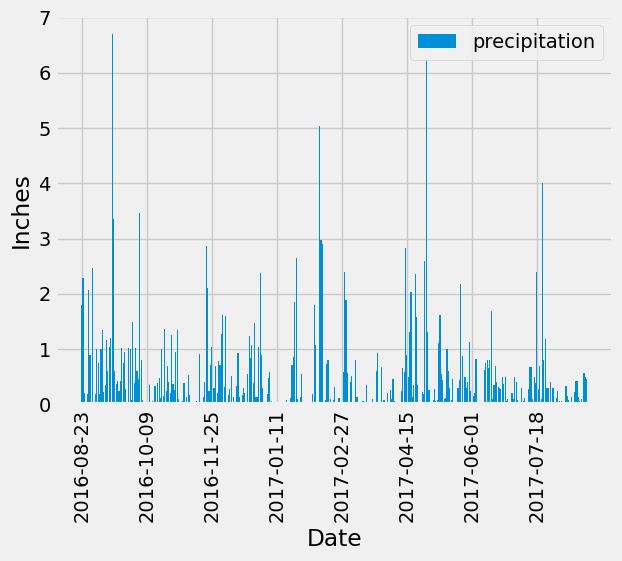

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent  = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
year_ago = recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
mquery = []
mquery = session.query(Measurement.date, Measurement.prcp).\
    filter((func.strftime(Measurement.date) <= recent) & (func.strftime(Measurement.date) >= year_ago)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
mquery_df = pd.DataFrame(mquery)
mquery_df = mquery_df.rename(columns={"prcp": "precipitation"})

# Sort the dataframe by date
mquery_df = mquery_df.sort_values(by="date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = np.arange(0,365,step=47)
plt.bar(mquery_df["date"], mquery_df["precipitation"],label='precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(x_axis, rotation='vertical')
plt.legend(loc='best')
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df = pd.DataFrame(mquery_df["precipitation"].describe(include = 'all'))
summary_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset

session.query(Station.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

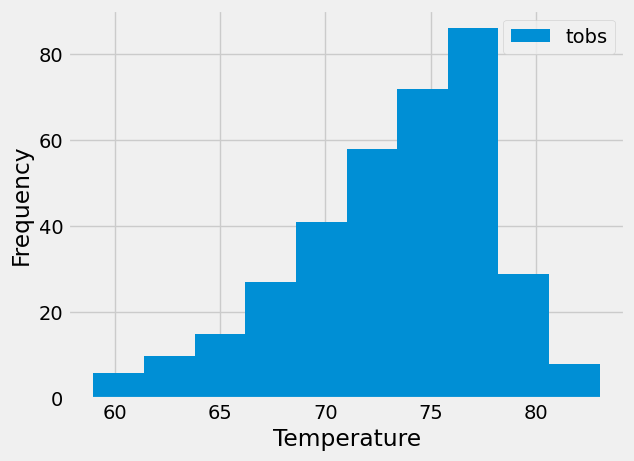

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = []
temps = session.query(Measurement.date, Measurement.tobs).\
    filter((func.strftime(Measurement.date) <= recent) & (func.strftime(Measurement.date) >= year_ago)
           &(Measurement.station =='USC00519281')).all()
temps_df = pd.DataFrame(temps)
ax = temps_df.plot.hist(xlabel = "Temperature")

# Close Session

In [17]:
# Close Session
session.close()